### Importing the Dependencies


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

### Importing the Dataset

In [2]:
diabetes_dataset = pd.read_csv('diabetes.csv')

In [3]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Checking the shape of the dataset
diabetes_dataset.shape

(768, 9)

### Data Preprocessing

In [5]:
# Checking if any Missing value is present or not
diabetes_dataset.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [6]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
diabetes_dataset['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


In [8]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


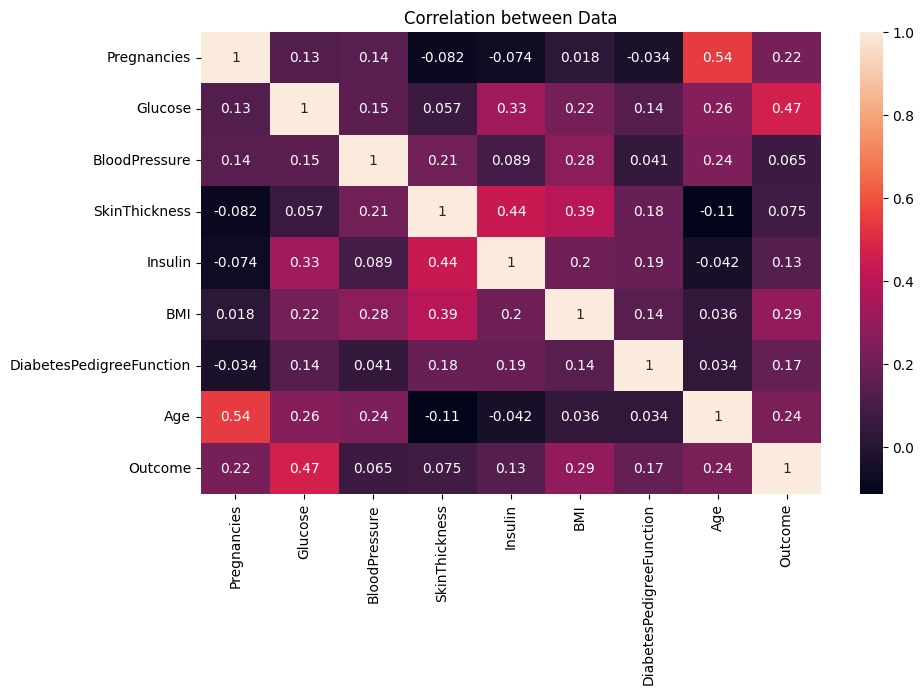

In [9]:
# Checking the Correlation

plt.figure(figsize=(10,6))
sns.heatmap(diabetes_dataset.corr(),annot=True)
plt.title("Correlation between Data")
plt.show()

In [10]:
list1=diabetes_dataset.columns

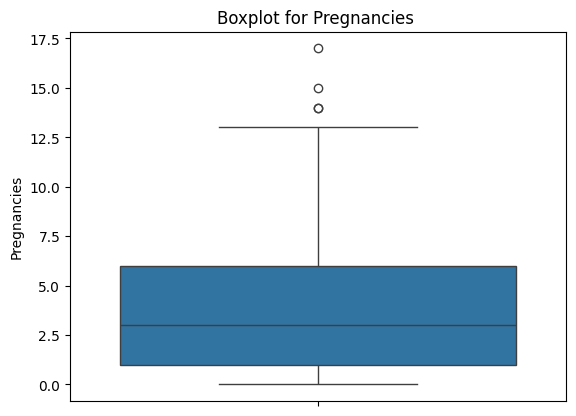

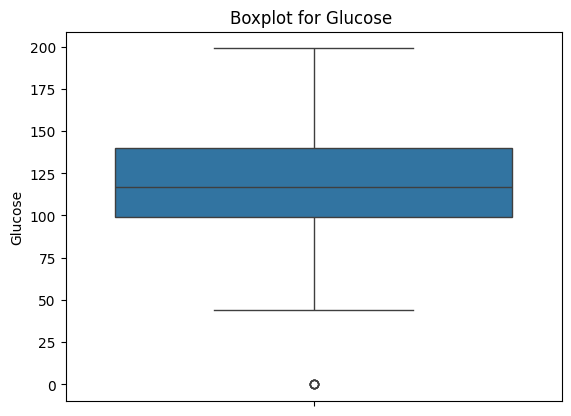

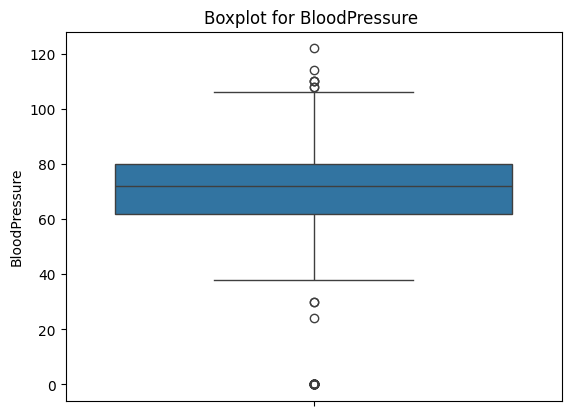

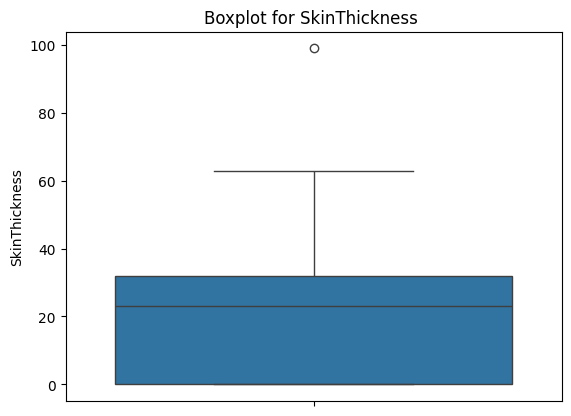

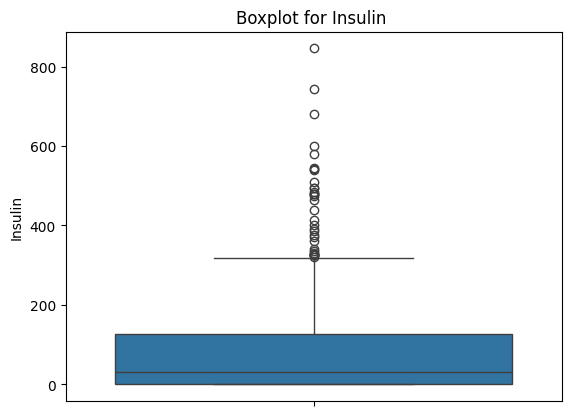

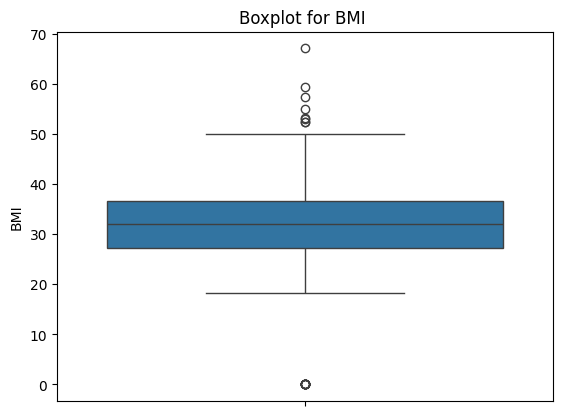

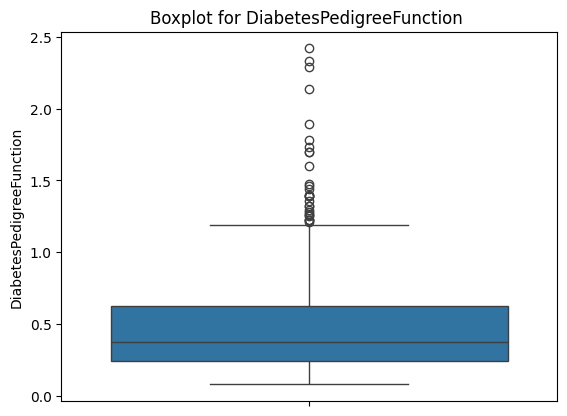

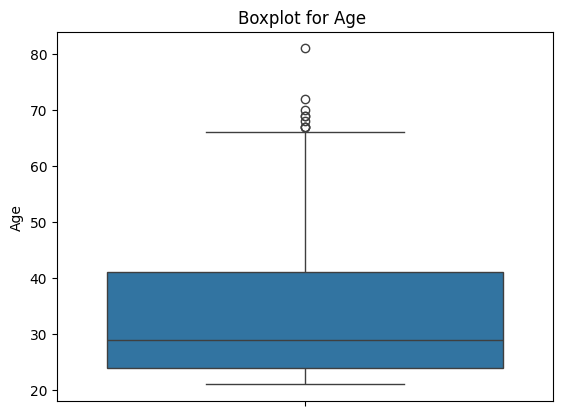

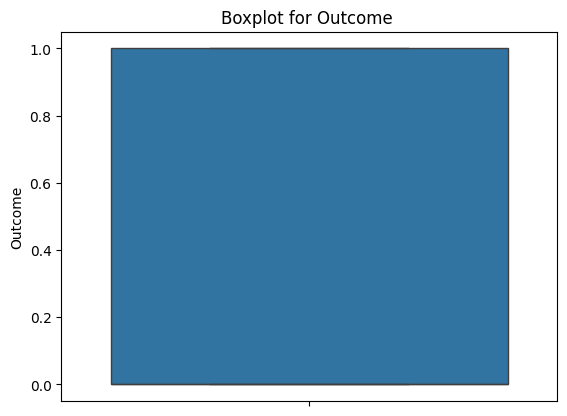

In [11]:
for i in list1:
  sns.boxplot(diabetes_dataset[i])
  plt.title(f"Boxplot for {i} ")
  plt.show()

In [12]:
df_no_outliers = diabetes_dataset.copy()

In [13]:
for column in list1:
    Q1 = df_no_outliers[column].quantile(0.25)
    Q3 = df_no_outliers[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out the outliers for the current column
    df_no_outliers = df_no_outliers[(df_no_outliers[column] >= lower_bound) & (df_no_outliers[column] <= upper_bound)]

print("Shape of the DataFrame before outlier removal:", diabetes_dataset.shape)
print("Shape of the DataFrame after outlier removal:", df_no_outliers.shape)

Shape of the DataFrame before outlier removal: (768, 9)
Shape of the DataFrame after outlier removal: (636, 9)


In [14]:
X=df_no_outliers.drop(columns="Outcome",axis=1)
Y=df_no_outliers['Outcome']

In [15]:
print(X)
print(Y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
5              5      116             74              0        0  25.6   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


### Scaling the Data

In [16]:
# Scale the data(like 0 to 1 range)
scalar=StandardScaler()

data_scaled=scalar.fit_transform(X)
print(data_scaled)

[[ 6.81425557e-01  1.00540261e+00 -6.96199653e-04 ...  2.56438414e-01
   8.19790711e-01  1.60468837e+00]
 [-8.57589551e-01 -1.16896300e+00 -5.32035774e-01 ... -8.40893209e-01
  -3.07223286e-01 -1.43040721e-01]
 [ 1.29703160e+00  2.21338350e+00 -7.09148966e-01 ... -1.35820669e+00
   1.00354299e+00 -5.10549792e-02]
 ...
 [ 3.73622536e-01  7.35316313e-02 -6.96199653e-04 ... -9.03597873e-01
  -7.40061995e-01 -2.35026462e-01]
 [-8.57589551e-01  2.46100331e-01 -1.06337535e+00 ... -2.92227397e-01
  -3.15390054e-01  1.32873114e+00]
 [-8.57589551e-01 -8.92853085e-01 -1.77809391e-01 ... -2.45198899e-01
  -4.54225112e-01 -8.78926652e-01]]


In [17]:
X=data_scaled
Y=df_no_outliers['Outcome']

In [18]:
print(X)
print(Y)

[[ 6.81425557e-01  1.00540261e+00 -6.96199653e-04 ...  2.56438414e-01
   8.19790711e-01  1.60468837e+00]
 [-8.57589551e-01 -1.16896300e+00 -5.32035774e-01 ... -8.40893209e-01
  -3.07223286e-01 -1.43040721e-01]
 [ 1.29703160e+00  2.21338350e+00 -7.09148966e-01 ... -1.35820669e+00
   1.00354299e+00 -5.10549792e-02]
 ...
 [ 3.73622536e-01  7.35316313e-02 -6.96199653e-04 ... -9.03597873e-01
  -7.40061995e-01 -2.35026462e-01]
 [-8.57589551e-01  2.46100331e-01 -1.06337535e+00 ... -2.92227397e-01
  -3.15390054e-01  1.32873114e+00]
 [-8.57589551e-01 -8.92853085e-01 -1.77809391e-01 ... -2.45198899e-01
  -4.54225112e-01 -8.78926652e-01]]
0      1
1      0
2      1
3      0
5      0
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 636, dtype: int64


### Spliting the data into Train and Test

In [19]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [20]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(508, 8) (128, 8) (508,) (128,)


### Training the model

In [21]:
svm_model=svm.SVC(kernel='linear')

svm_model.fit(X_train,Y_train)

model_pred=svm_model.predict(X_train)

# Checking the prediction score on seen data
model_accuracy=accuracy_score(model_pred,Y_train)

print("Accuracy of the model on Training Dataset :",model_accuracy)

Accuracy of the model on Training Dataset : 0.7893700787401575


### Testing the model

In [22]:
# Checking the prediction score on unseen data
model_pred_2=svm_model.predict(X_test)

model_accuracy_2=accuracy_score(model_pred_2,Y_test)

print("Accuracy of the model on Testing Dataset :",model_accuracy_2)

Accuracy of the model on Testing Dataset : 0.8046875


### Making the prediction fuction

In [23]:
def Prediction(data):
  # convert to array
  data_array=np.asarray(data)

  # reshaping to prediction input
  data_reshaped=data_array.reshape(1,-1)

  # scaling the input
  data_scal=scalar.transform(data_reshaped)

  #predicting the Outcome
  prediction=svm_model.predict(data_scal)

  if prediction[0]==0:
    print("the person is not diabetic")
  else:
    print("the person is diabetic")


In [24]:
input_data=(4,110,92,0,0,37.6,0.191,30)
Prediction(input_data)

the person is not diabetic


In [25]:
input_data2=(5,166,72,19,175,25.8,0.587,51)
Prediction(input_data2)

the person is diabetic


In [26]:
input_data3=(5,139,64,35,140,28.6,0.411,26)
Prediction(input_data3)

the person is not diabetic
